### The burger - kdv equation

In [1]:
import functools as ft
import multiprocessing as mp
import logging

from IPython.display import Image, display, HTML
import numpy as np
from scipy.signal import gaussian

import pylab as pl

from triflow import Model, Simulation, schemes, displays

pl.style.use('seaborn-white')

%matplotlib inline

This notebook is an attempt to reproduce the [Dedalus Project tutorial](http://nbviewer.jupyter.org/urls/bitbucket.org/dedalus-project/dedalus/raw/tip/docs/notebooks/dedalus_tutorial_problems_solvers.ipynb). The equation to solve is

$$\partial_{t}\,U + U \partial_{x}\,U = a\partial_{xx}\,U + b\partial_{xxx}\,U$$

In [2]:
model = Model("-U * dxU + a * dxxU + b * dxxxU",
              "U", ["a", "b"])

We discretize our spatial domain. `retstep=True` ask to return the spatial step.

In [3]:
x, dx = np.linspace(-2, 6, 1000, retstep=True, endpoint=False)

We initialize with the same initial condition as in the Dedalus tutorial

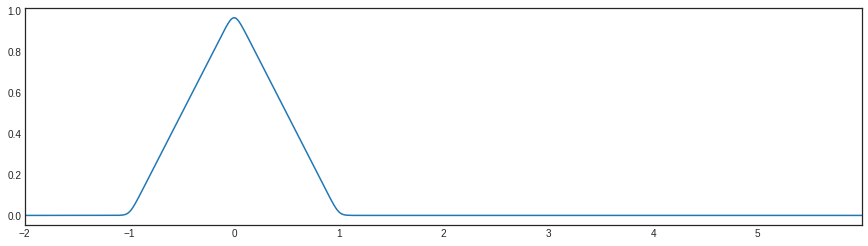

In [4]:
n = 20
U = np.log(1 + np.cosh(n)**2/np.cosh(n*x)**2) / (2*n)

fields = model.fields_template(x=x, U=U)

pl.figure(figsize=(15, 4))
pl.plot(fields.x, fields.U)
pl.xlim(x.min(), fields.x.max())
pl.show()

We precise our parameters. The default scheme provide an automatic time_stepping.

In [5]:
parameters = dict(a=2E-4, b=1E-4, periodic=False)

We initialize the simulation.

In [7]:
t = 0
simulation = Simulation(model, t, fields, parameters,
                        dt=.05, tmax=10, tol=1E-1)

We iterate on the simulation until the end.

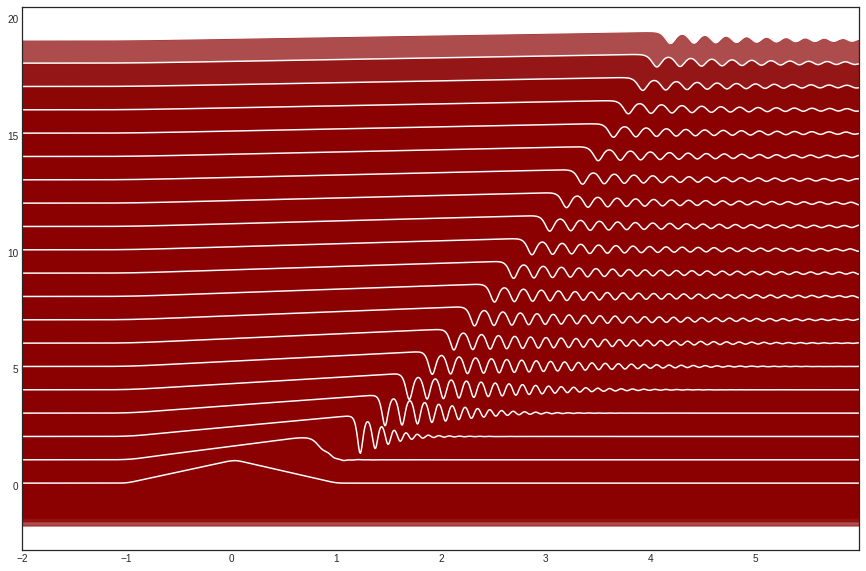

In [8]:
pl.figure(figsize=(15, 10))
full_data = displays.window_data()
for i, (t, fields) in enumerate(simulation):
    if i % 10 == 0:
        pl.fill_between(fields.x, fields.U + .1 * (i + 1),
                        fields.U.min() - 1,
                        color='darkred', zorder=-2 * i, alpha=.7)
        pl.plot(fields.x, fields.U + .1 * (i + 1), 
                color='white',
                zorder=-(2 * i) + 1)
    print(f"t: {t:g}".ljust(80), end='\r')
    data = full_data.send((t, fields))
pl.xlim(x.min(), fields.x.max())
pl.show()

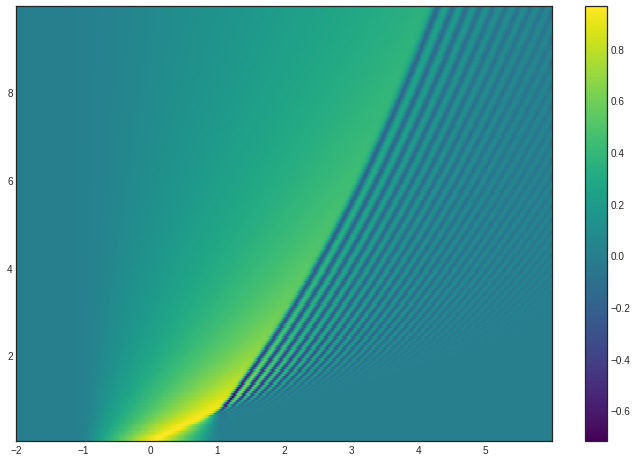

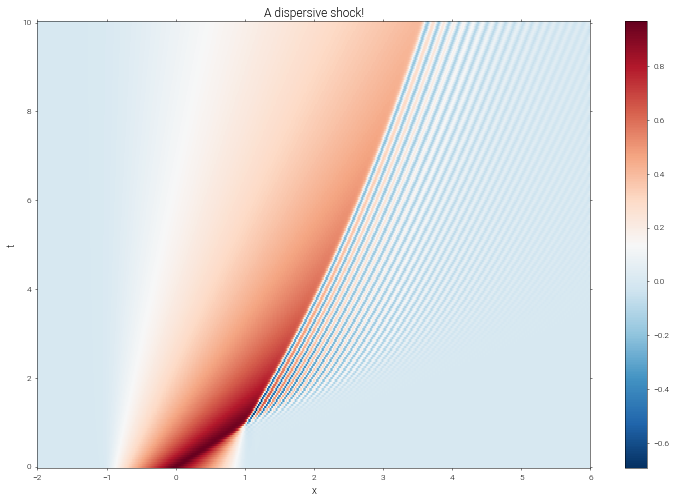

In [9]:
display(HTML("<h3>Triflow result</h3>"))
pl.figure(figsize=(12, 8))
pl.pcolormesh(data['fields']['x'][-1], data['t'], data['fields']['U'], cmap='viridis')
pl.colorbar()
pl.show()
display(HTML("<h3>Dedalus result</h3>"))
display(Image('dedalus-kdv.png'))